<a href="https://colab.research.google.com/github/johntanas/it1244project/blob/main/code/label_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import warnings
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [40]:
#set to true if using colab
onlinedataset=False
if onlinedataset:
  url = "https://drive.google.com/file/d/1TBcW6O9KMRMh9CWf36OIjZwvY-qzH1VS/view?usp=sharing"
  url='https://drive.google.com/uc?id=' + url.split('/')[-2]
  credit_record=pd.read_csv(url,index_col=0)
else:
  pathtodataset="../content/credit_record.csv"
  credit_record=pd.read_csv(pathtodataset,index_col=0)

In [41]:
credit_record

,id,month_bal,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [42]:
credit_record["month_bal"].unique(),credit_record["status"].unique()

(array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
        -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
        -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
        -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
        -52, -53, -54, -55, -56, -57, -58, -59, -60], dtype=int64),
 array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object))

In [43]:
to_avg={"X":-1,"C":0}
for i in range(6):
  to_avg[str(i)]=i+1

# get a better plot

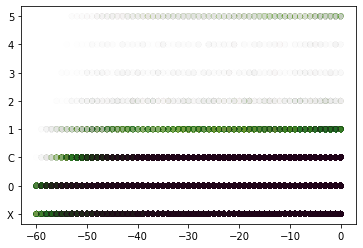

In [44]:
plt.scatter(credit_record["month_bal"],credit_record["status"],alpha=0.005,c=credit_record["id"])
plt.show()

In [45]:
credit_record=credit_record.replace({"status":to_avg})

In [46]:
credit_record

,id,month_bal,status
0,5001711,0,-1
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


In [47]:
avg=credit_record.groupby("id")["status"].mean()

<AxesSubplot:ylabel='Density'>

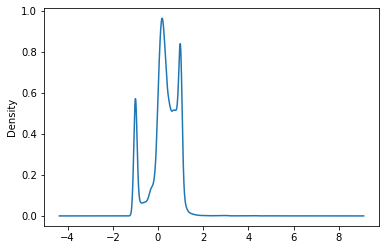

In [48]:
avg.plot.kde()

In [49]:
X=StandardScaler().fit_transform(np.array(avg).reshape(-1,1))

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [50]:
inertias = []
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)
  
    mapping2[k] = kmeanModel.inertia_

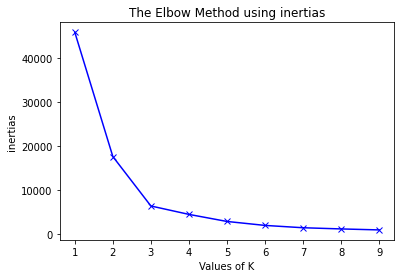

In [51]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('inertias')
plt.title('The Elbow Method using inertias')
plt.show()

It seems K=3 is the elbow and from the histogram

In [52]:
df=pd.DataFrame(avg)
label1=df.copy()

We repeat Kmeans with 30 random states as 30 already is a statisically large sample size

In [53]:
maxInertia=float("INF")
bestkmeans=None
for i in range(30):
  kmeanModel = KMeans(n_clusters=3,random_state=i).fit(X)
  kmeanModel.fit(X)
  if kmeanModel.inertia_<maxInertia:
    print(f"better clusters found with inertia = {kmeanModel.inertia_} at \n{kmeanModel.cluster_centers_}")
    bestkmeans=kmeanModel
    maxInertia=kmeanModel.inertia_


better clusters found with inertia = 6364.312706010388 at 
[[-0.15458969]
 [-1.91332462]
 [ 0.96845536]]
better clusters found with inertia = 6364.312706010387 at 
[[-1.91332462]
 [-0.15458969]
 [ 0.96845536]]
better clusters found with inertia = 6364.301357860698 at 
[[-0.15511067]
 [-1.91414336]
 [ 0.96804677]]
better clusters found with inertia = 6364.301357860697 at 
[[-0.15511067]
 [-1.91414336]
 [ 0.96804677]]


In [54]:
label1["label"]=bestkmeans.labels_

In [55]:
label1.to_csv("../content/average_label.csv")

We can also try kmeans on the exponential moving average!

In [56]:
descDf=credit_record.sort_values(['id','month_bal'],ascending=[True,True])

We set alpha = 0.5 to give receny bias

In [57]:
eMovingAvg=descDf.groupby("id")["status"].ewm(alpha=0.5).mean()

In [58]:
clustering2=eMovingAvg.groupby("id").nth([-1])

<AxesSubplot:ylabel='Density'>

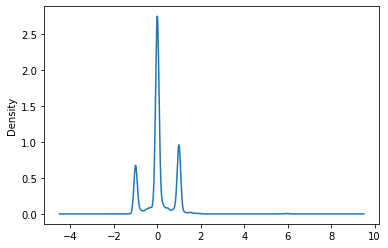

In [59]:
clustering2.plot.kde()

In [60]:
Xevm=StandardScaler().fit_transform(np.array(clustering2).reshape(-1, 1))

set k =3

In [61]:
max2Inertia=float("INF")
best2kmeans=None
for i in range(30):
  kmeanModel = KMeans(n_clusters=3,random_state=i).fit(Xevm)
  kmeanModel.fit(Xevm)
  if kmeanModel.inertia_<max2Inertia:
    print(f"better clusters found with inertia = {kmeanModel.inertia_} at \n{kmeanModel.cluster_centers_}")
    best2kmeans=kmeanModel
    max2Inertia=kmeanModel.inertia_


better clusters found with inertia = 6056.017686955832 at 
[[-0.12756356]
 [ 1.44536237]
 [-1.58846903]]
better clusters found with inertia = 6056.017686955831 at 
[[ 1.44536237]
 [-0.12756356]
 [-1.58846903]]


In [62]:
label2=df.copy()

In [63]:
label2["label"]=best2kmeans.labels_

In [64]:
label2.to_csv("../content/exvm_label.csv")

In [65]:
credit_record[credit_record["status"]>1]

,id,month_bal,status
150,5001718,-8,2
154,5001718,-12,2
224,5001720,0,2
227,5001720,-3,2
228,5001720,-4,2
...,...,...,...
1048241,5150464,-9,2
1048242,5150464,-10,2
1048243,5150464,-11,2
1048244,5150464,-12,2


In [66]:
max_data=credit_record.groupby("id").max()["status"]

(array([ 4536.,  1417., 34682.,     0.,  4683.,   336.,     0.,    88.,
           48.,   195.]),
 array([-1. , -0.3,  0.4,  1.1,  1.8,  2.5,  3.2,  3.9,  4.6,  5.3,  6. ]),
 <BarContainer object of 10 artists>)

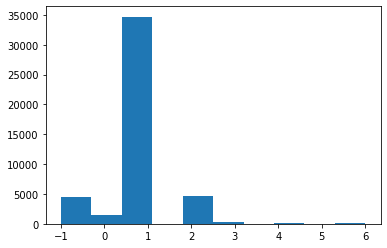

In [67]:
plt.hist(max_data)

In [68]:
X=StandardScaler().fit_transform(np.array(max_data).reshape(-1,1))

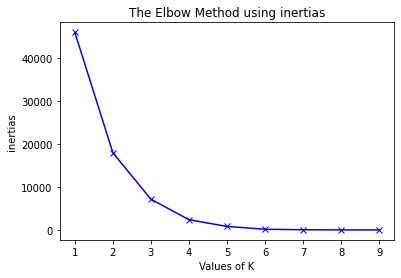

In [69]:
inertias = []
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)
  
    mapping2[k] = kmeanModel.inertia_
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('inertias')
plt.title('The Elbow Method using inertias')
plt.show()

Elbow is k =4

In [70]:
maxInertia=float("INF")
bestkmeans=None
for i in range(30):
  kmeanModel = KMeans(n_clusters=4,random_state=i).fit(X)
  kmeanModel.fit(X)
  if kmeanModel.inertia_<maxInertia:
    print(f"better clusters found with inertia = {kmeanModel.inertia_} at \n{kmeanModel.cluster_centers_}")
    bestkmeans=kmeanModel
    maxInertia=kmeanModel.inertia_

better clusters found with inertia = 2379.532265047955 at 
[[ 0.09694962]
 [-2.02437326]
 [ 5.30194336]
 [ 1.38149914]]


The kmeans is not clustering the data properly as the data is skewed ( from histogram)

In [71]:
label3=pd.DataFrame(max_data>1)

In [72]:
label3["status"]=label3['status'].astype(int)

In [73]:
label3.to_csv("../content/max_label.csv")